In [5]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import  missingno as msn
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Read and create a dataframe
telecom_df = pd.read_csv('telecom_churn.csv')

# Return the first five entries
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# Basic information about the data

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
# Check out the shape of the data

telecom_df.shape

(3333, 20)

We have 3333 rows and 20 columns from the table . Its divided into integers , floats and objects . From this output we can immediately deduce that we have no missing values . We will look at missing values later , in the meantime lets look at the statistical characteristics our numeric features .

In [9]:
# Summary statistics

telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


We have 3333 entries in the data . We can also recognize that the maximum total calls per day is 165.000000 , the average total calls per day is 100.435644. Its not only about this feature but this output shows statistical characteristics of all the numerical features . This will be of help in our analysis.

In [10]:
# Look for duplicates
telecom_df.duplicated().sum()

0

There are no duplicates in our table . Lets move on !

# Data Cleaning

In [42]:
# Handle missing data

missing = (telecom_df.isnull().sum())% 100
missing


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

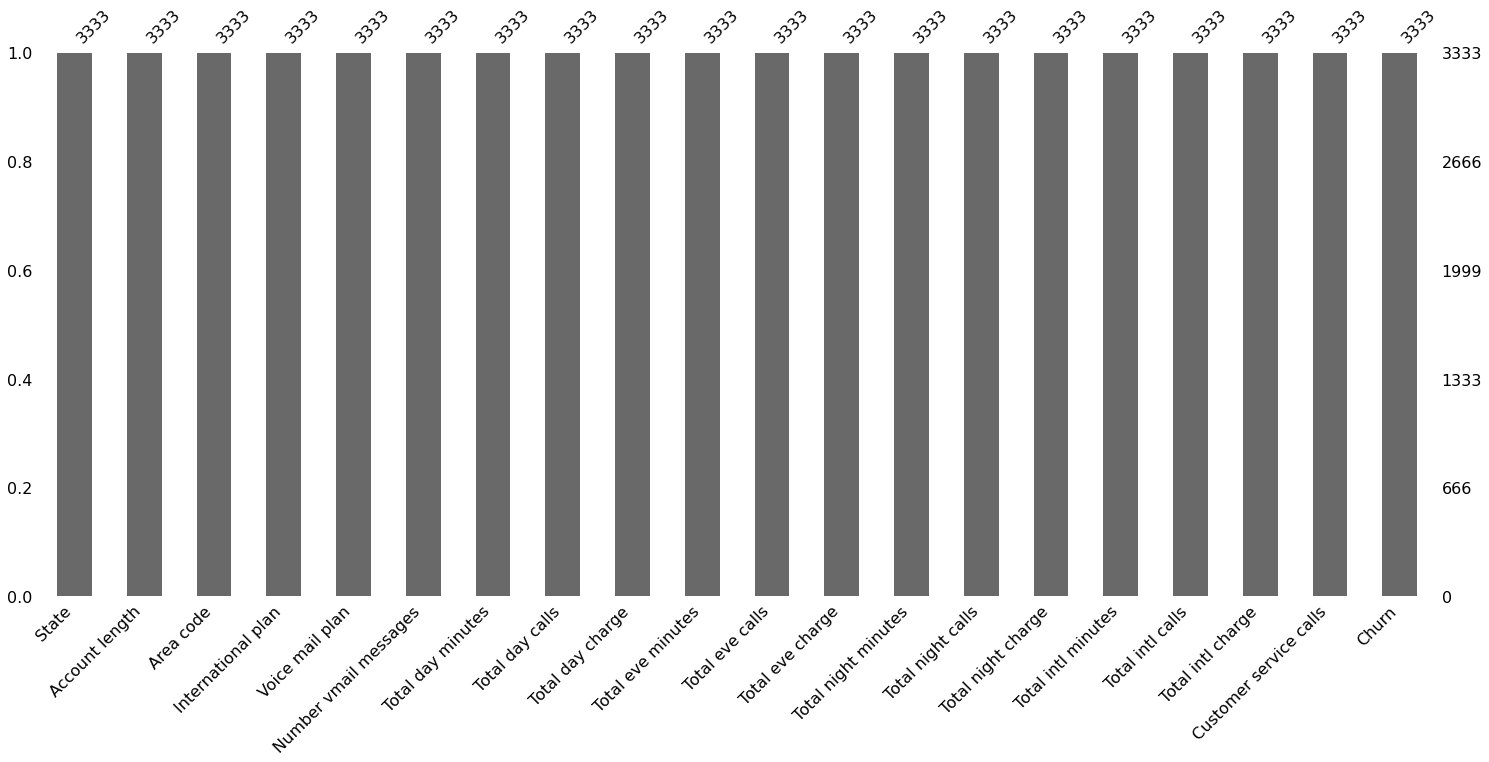

In [12]:
# Visualize the missing values 

msn.bar(telecom_df);

Finally we can conclude that our dataset has no missing values and there are no duplicates .

### Handling Inconsistencies within the Data

In [13]:
# Check datatypes

telecom_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [14]:
# Change data types from objects to interger64

telecom_df.Churn = telecom_df.Churn.astype('int64')

Churn is of datatype bool . It will be better if we transorm it into int64 , so that we can compute and perform some data analysis on it . 1 represents True (churned customers) , 0 represents False(loyal customers). 

# Data Analysis

The goal is to figure to what extent the churn rate is affected by other features within our data. We also look analysis the actions of churned users and loyal users .

### Data Distribution

Before anaylsis lets explore the data distribution of minutes spent on call by consumers and charges during the day and at night .

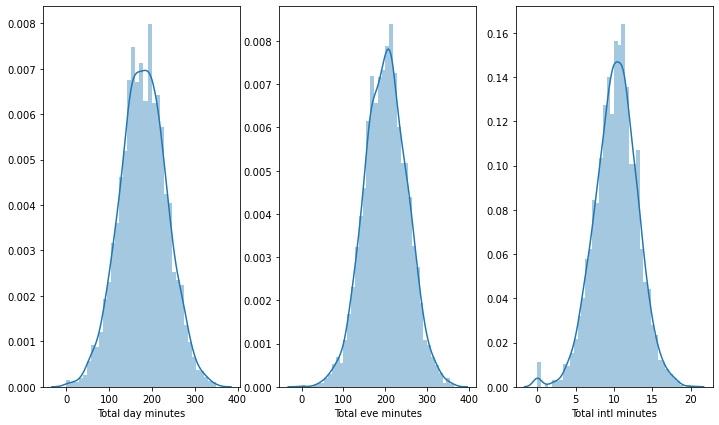

In [24]:
# Set the size of the figure
plt.figure(figsize=(12,7))
plt.subplot(1,3,1)

# Plot a distribution of total day minutes
sns.distplot(telecom_df["Total day minutes"]);

# Plot a distribution of total eve minutes
plt.subplot(1,3,2)
sns.distplot(telecom_df["Total eve minutes"]);

# Plot a distrbution of total international minutes .
plt.subplot(1,3,3)
sns.distplot(telecom_df["Total intl minutes"]);

plt.show() # Show

Insight : 
    
The minutes spent on the phone during the day , in the evening and on international call follows a normal distribution . This means that our mode is closer to our mean and median . On average 200 minutes are spent on a  call during the day by a consumer . This values is the same in the evening . On average 10 minutes are spent on international calls . We have less action when it comes to international calls .

In [38]:
# Compute the average times spent by churned users .
day_churn = telecom_df[telecom_df["Churn"] == 1]["Total day minutes"].mean()

even_churn = telecom_df[telecom_df["Churn"] == 1]["Total eve minutes"].mean()

intl_churn = telecom_df[telecom_df["Churn"] == 1]["Total intl minutes"].mean()

# Print the results .
print(f'Average minutes churned users spend on the phone during the day : {day_churn}')

print(f'Average minutes churned users spend on the phone during the evening : {even_churn}')

print(f'Average minutes  churned users spend on international calls : {intl_churn}')

Average minutes churned users spend on the phone during the day : 206.91407867494814
Average minutes churned users spend on the phone during the evening : 212.41014492753618
Average minutes  churned users spend on international calls : 10.699999999999996


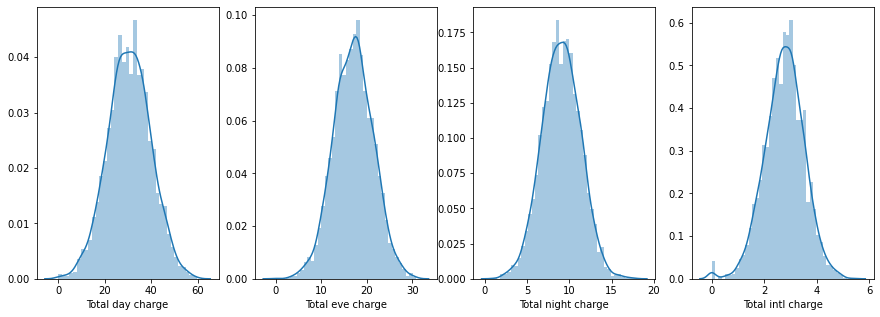

In [33]:

# Set the size of the figure
plt.figure(figsize=(15,5))

# Plot the distribution of total day charges
plt.subplot(1,4,1)
sns.distplot(telecom_df["Total day charge"]);

# Plot the distribution of total evening charges
plt.subplot(1,4,2)
sns.distplot(telecom_df["Total eve charge"]);

# Plot the distribution of the total night charges 
plt.subplot(1,4,3)
sns.distplot(telecom_df["Total night charge"]);

# Plot the distribution of total international charges .
plt.subplot(1,4,4)
sns.distplot(telecom_df["Total intl charge"]);


plt.show()

Insight :

Total day charge on average is 25 . In the evening the average charge is 18 . Total night charge is 9 on average and 3 on international calls . Thus in general , during the day the charge is high .


In [39]:
# Compute the average times spent by churned users .
day_churn = telecom_df[telecom_df["Churn"] == 1]["Total day charge"].mean()

even_churn = telecom_df[telecom_df["Churn"] == 1]["Total eve charge"].mean()

night_churn = telecom_df[telecom_df["Churn"] == 1]["Total night charge"].mean()

intl_churn = telecom_df[telecom_df["Churn"] == 1]["Total intl charge"].mean()

# Print out the results

print(f'Average day charge for churned users : {day_churn}')

print(f'Average evening charge for churned users : {even_churn}')

print(f'Average international charge for churned users : {night_churn}')

print(f'Average night charge for churned users : {intl_churn}')

Average day charge for churned users : 35.17592132505176
Average evening charge for churned users : 18.054968944099382
Average international charge for churned users : 9.235527950310564
Average night charge for churned users : 2.889544513457558


### Correlations

Lets have a look at the correlations and the relationships of different features in our data . 

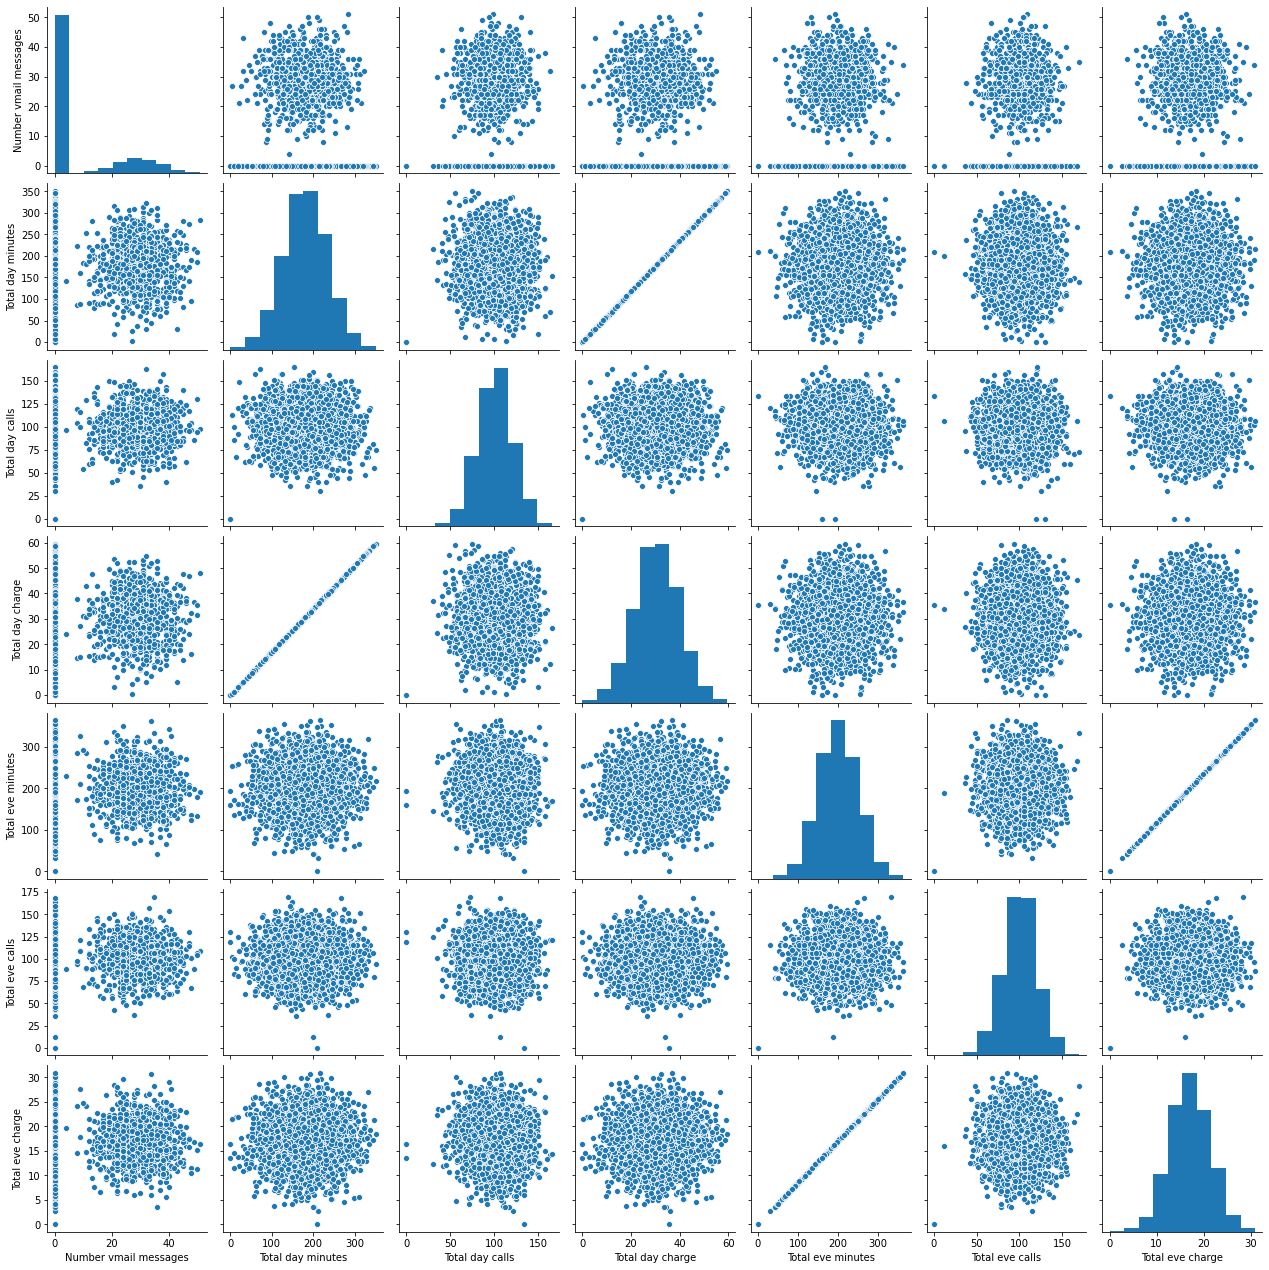

In [15]:
sns.pairplot(telecom_df.loc[:,'Number vmail messages': 'Total eve charge']);

Its easy to notice that is a strong relationship between the total evening minutes and the total evening  charges. This is the same for total day charges and the total night charges .  We soon realise that there are some features which are not related . This help us select the features which have a strong relationship and can help us predict outcomes . In this case our target variable is churn .

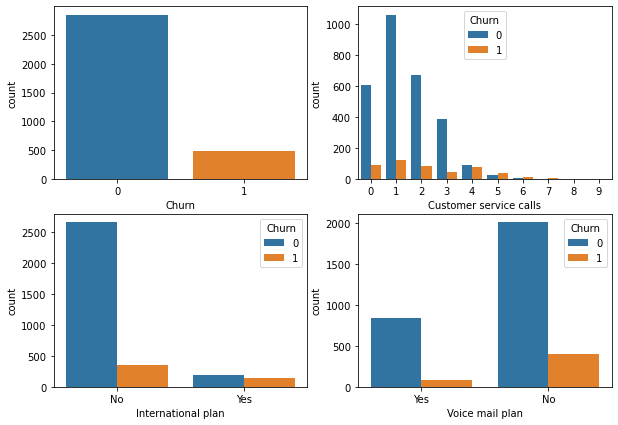

In [34]:
# Set the size of the figure
plt.figure(figsize=(10,7))

# Plot a countplot for status of the users (churned or not) 
plt.subplot(2,2,1)
sns.countplot(x = telecom_df.Churn);

# Plot a subplot of customer service calls given churn
plt.subplot(2,2,2)
sns.countplot(x="Customer service calls", hue="Churn", data=telecom_df);

# Plot a subplot of internation plan given churn
plt.subplot(2,2,3)
sns.countplot(x = telecom_df['International plan'],hue = telecom_df['Churn']);

# Plot a subplot of voice mail plan given churn
plt.subplot(2,2,4)
sns.countplot(x="Voice mail plan", hue="Churn", data=telecom_df);

plt.show()




There are over 2500 loyal customers and about 500 churned . This information is usefull in a business , lets get the exact values of our loyal customers and churned customers(below).

Loyal customers do not have international plans ,most of them . And when it comes to voicemail plans , most churned customers have no voicemail plans and a fair number of loyal customers have voice mail plans . When International Plan is enabled, the churn rate is much higher

Churn rate increases significantly after 4 or more calls to customer service

In [43]:
#Count the valu of churned and loyal customers
telecom_df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

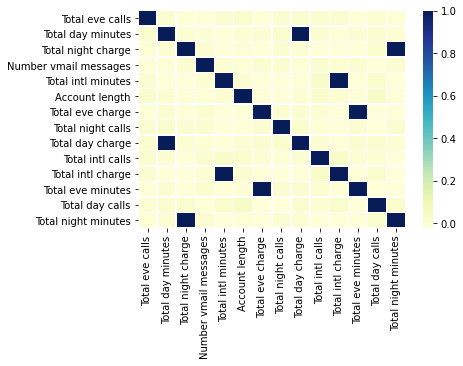

In [18]:
# Make a list of numerical features for the heatmap
numerical = list(
    set(telecom_df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = telecom_df[numerical].corr()
sns.heatmap(corr_matrix,linewidths=.5,cmap="YlGnBu");

Lets get a clear picture of the relationships within our features . The darker the color the stronger the relationship . We soon realise that there is a strong relationship between features like total eve minutes and total eve charges , this holds true for total day minutes as well  

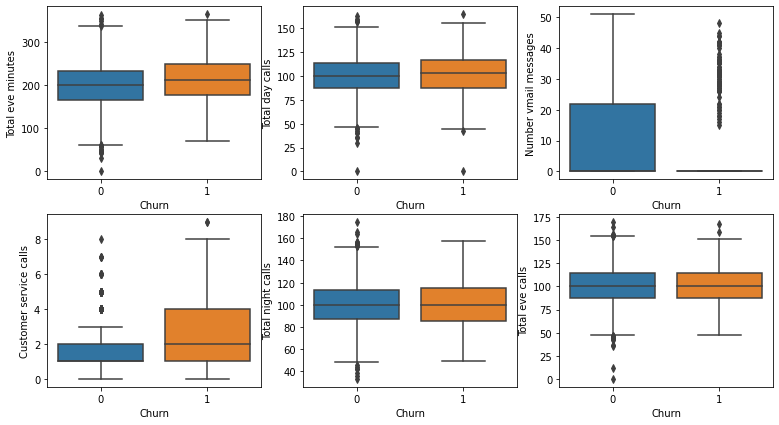

In [19]:
# Boxplots

plt.figure(figsize=(13,7))
plt.subplot(2,3,1)
sns.boxplot(x= 'Churn', y = 'Total eve minutes', data = telecom_df);

# Plot a boxplot with churn and total day calls 
plt.subplot(2,3,2)
sns.boxplot(x= 'Churn', y = 'Total day calls', data = telecom_df);

# Plot a boxplot with churn and number of vmail messages
plt.subplot(2,3,3)
sns.boxplot(x= 'Churn', y = 'Number vmail messages', data = telecom_df);

# Plot a boxplot with churn and customer service calls 
plt.subplot(2,3,4)
sns.boxplot(x= 'Churn', y = 'Customer service calls', data = telecom_df);

# Plot a boxplot with churn and total night calls .
plt.subplot(2,3,5)
sns.boxplot(x= 'Churn', y = 'Total night calls', data = telecom_df);

# Plot a boxplot with churn and total evening calls .
plt.subplot(2,3,6)
sns.boxplot(x= 'Churn', y = 'Total eve calls', data = telecom_df);

plt.show()

The first observation on average : customers that discontinue their contracts are more active users of communication services. Most churned users call a lot during the evening and during the day compared to loyal users (those who stick with us ). Most churned users barely use our vmail messages whereas mot of our loyal users are huge fans of vmail messages .

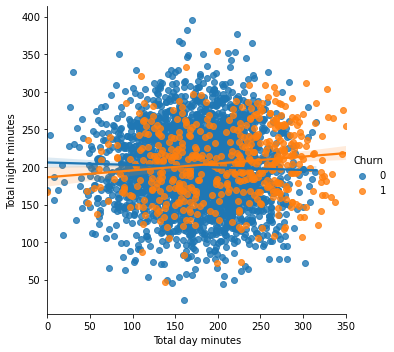

In [20]:
# Plot an implot total day minutes vs night minutes give churn
sns.lmplot(
    "Total day minutes", "Total night minutes", data=telecom_df, hue="Churn", fit_reg=True
);


Here we try to analysis how churned users use the product in relation to minutes spent during the day and night . It appears that a portion of the users spent time more minutes both during the day and night . A fair number of customers spend more time during the night .

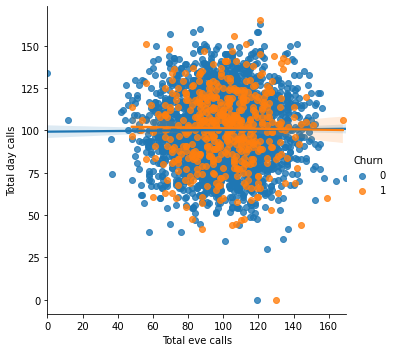

In [21]:
sns.lmplot(
    "Total eve calls", "Total day calls", data=telecom_df, hue="Churn", fit_reg=True)

Here we try to understand the total day calls for churned users in relation to total evening calls .  We realise that we have some outliers .  Users who spent most of time calling in the evenig than during the day . We also see that most churned users spent fairly the same amount time in the evening and during the day .

### Conclusion

In conclusin , the goal was to discover how other feautures in the dataset affect the status of our users . By status is meant , wether is churned or loyal . We discovered that on average the business lose about 14 % of its customers . This a huge number .

In [40]:
# Average churn
telecom_df["Churn"].mean()

0.14491449144914492

The churn rate increases significantly after 4 or more calls to customer service

Customers that discontinue their contracts are more active users of communication services

On average the business lose about 14 % of its customers
    
Disloyal customers tend to spend more time on the phone during both day and night

Most churned users barely use our vmail messages whereas mot of our loyal users are huge fans of vmail messages

When International Plan is enabled, the churn rate is much higher
